In [1]:
import pandas as pd
import glob
from io import StringIO
import collections
import matplotlib.pyplot as plt

In [2]:
csv_paths = glob.glob('./data/*.csv')

In [3]:
cols = []
df_data = []
for path in csv_paths:
    with open(path,"r+", encoding="iso-8859-1") as f:
        title = f.readline()
        lines = f.readlines()
        
        #Discard all the header lines that start with '#'
        without_header = [line for line in lines if line[0] != '#']
        
        #Read remaining lines as a csv, get column names and save results
        df = pd.read_csv(StringIO(''.join(without_header)))
        cols.append(df.columns)
        
        file_name = path.split('\\')[-1]
        df_data.append([file_name, list(df.columns)])
        
    #Print progress
    print(f'{len(cols)} / {len(csv_paths)}',end="\r")

In [4]:
pd.DataFrame(df_data)

0  \
0         06AQ19870704_hy1.csv   
1         06AQ19920929_hy1.csv   
2         06AQ19930806_hy1.csv   
3         06AQ19950707_hy1.csv   
4         06AQ19960712_hy1.csv   
..                         ...   
978             sr04_b_hy1.csv   
979             sr04_d_hy1.csv   
980             sr04_e_hy1.csv   
981  XP00_90CI20000602_hy1.csv   
982  XP99_90CI19990827_hy1.csv   

                                                     1  
0    [EXPOCODE, SECT_ID, STNNBR, CASTNO, SAMPNO, BT...  
1    [EXPOCODE, SECT_ID, STNNBR, CASTNO, BTLNBR, DA...  
2    [EXPOCODE, STNNBR, CASTNO, BTLNBR, DATE, LATIT...  
3    [EXPOCODE, SECT_ID, STNNBR, CASTNO, BTLNBR, BT...  
4    [EXPOCODE, SECT_ID, STNNBR, CASTNO, SAMPNO, BT...  
..                                                 ...  
978  [EXPOCODE, SECT_ID, STNNBR, CASTNO, SAMPNO, BT...  
979  [EXPOCODE, SECT_ID, STNNBR, CASTNO, SAMPNO, BT...  
980  [EXPOCODE, SECT_ID, STNNBR, CASTNO, SAMPNO, BT...  
981  [EXPOCODE, SECT_ID, STNNBR, CASTNO, SAMPNO, BT...  
982  [EXPOCODE, SECT_ID, STNNBR, CASTNO, SAMPNO, BT...  

[983 rows x 2 columns]

In [5]:
#Flatten 2d list to 1d and count all elements
flat_list = [item for csv in cols for item in csv]
most_common = collections.Counter(flat_list).most_common()[:50]

#Prepare counted values for plotting
most_common.reverse()
bar_names, bar_width = zip(*most_common)

Text(0.5, 1.0, '50 most common variables in csv files')

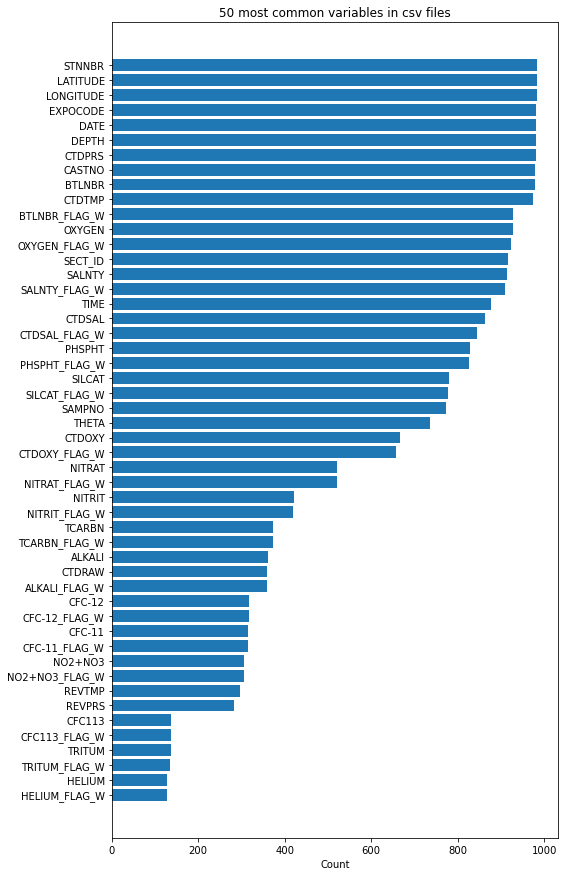

In [6]:
plt.figure(figsize = (8, 15))

plt.barh(bar_names, bar_width)
plt.xlabel('Count')
plt.title('50 most common variables in csv files')